# Early stopping

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree 


X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 2,
                            n_redundant = 0, n_classes = 3, random_state = 10, 
                           flip_y = 0.02, class_sep = 1, n_clusters_per_class = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 32)

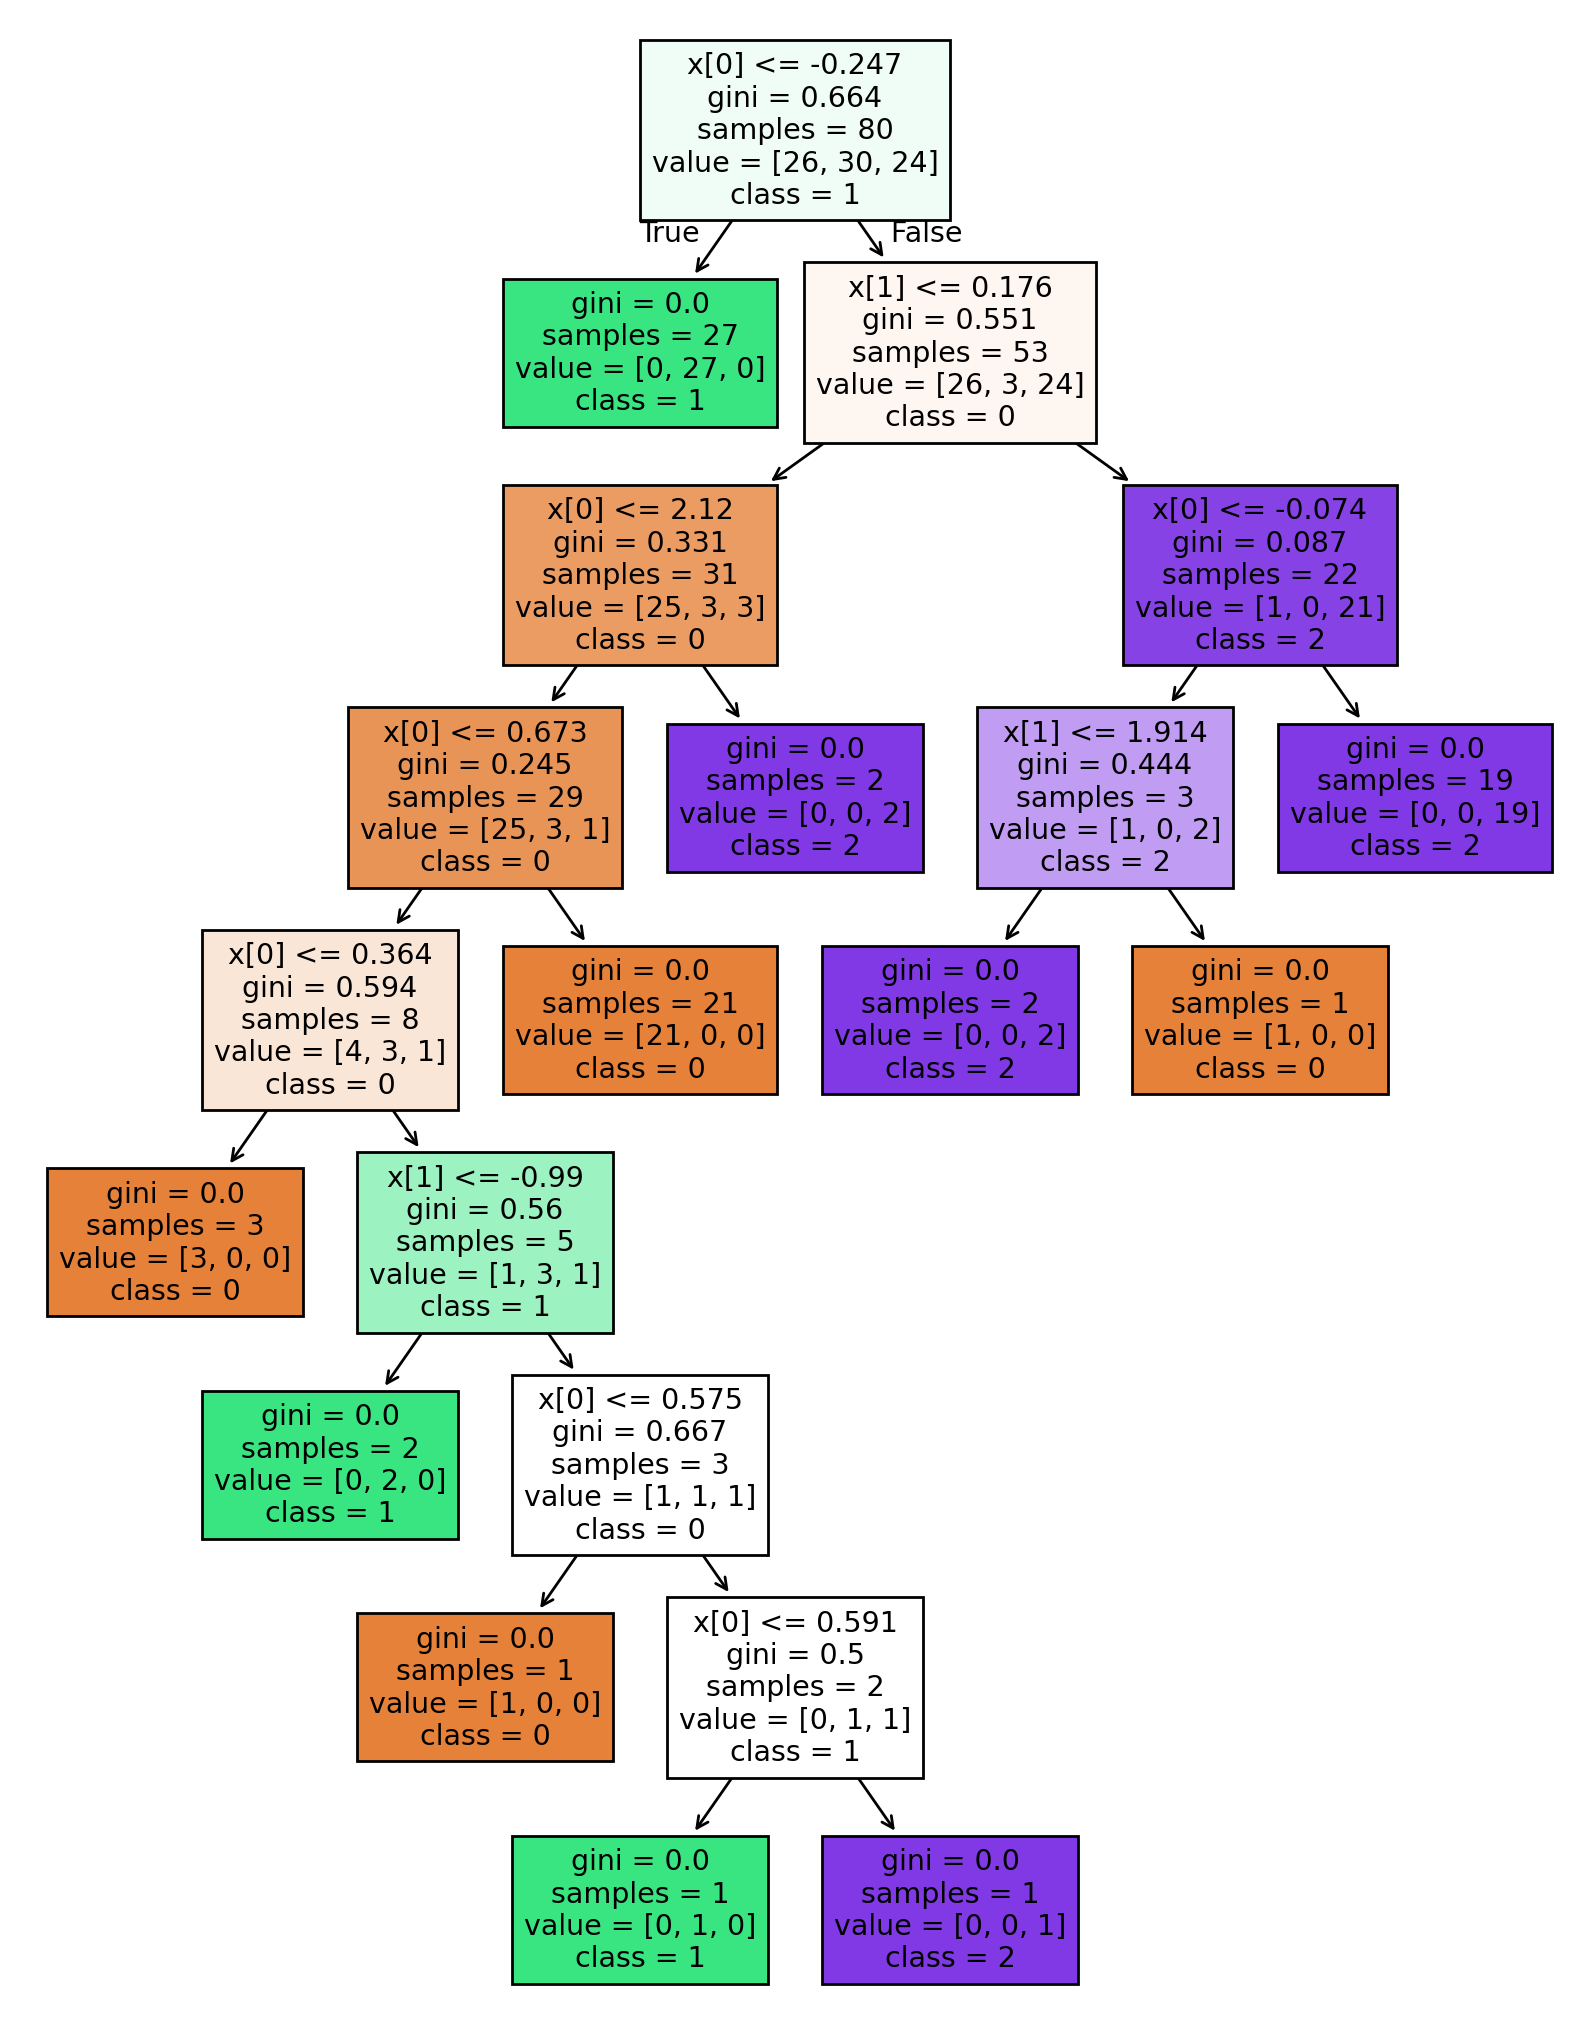

Training Accuracy: 1.0
Test Accuracy 0.75


In [8]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Train a decision tree with default parameters
clf1 = DecisionTreeClassifier(random_state = 12)   # Every time we will set random_state to 12
clf1.fit(X_train, y_train)  

# Plot the tree structure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,13), dpi=200)
plot_tree(clf1, feature_names=X_train.columns if hasattr(X_train, "columns") else None, 
          class_names=[str(cls) for cls in clf1.classes_],
          filled=True)
plt.show()

print("Training Accuracy:", accuracy_score(y_train, clf1.predict(X_train)))
print("Test Accuracy",accuracy_score(y_test, clf1.predict(X_test)))

## Depth limitation

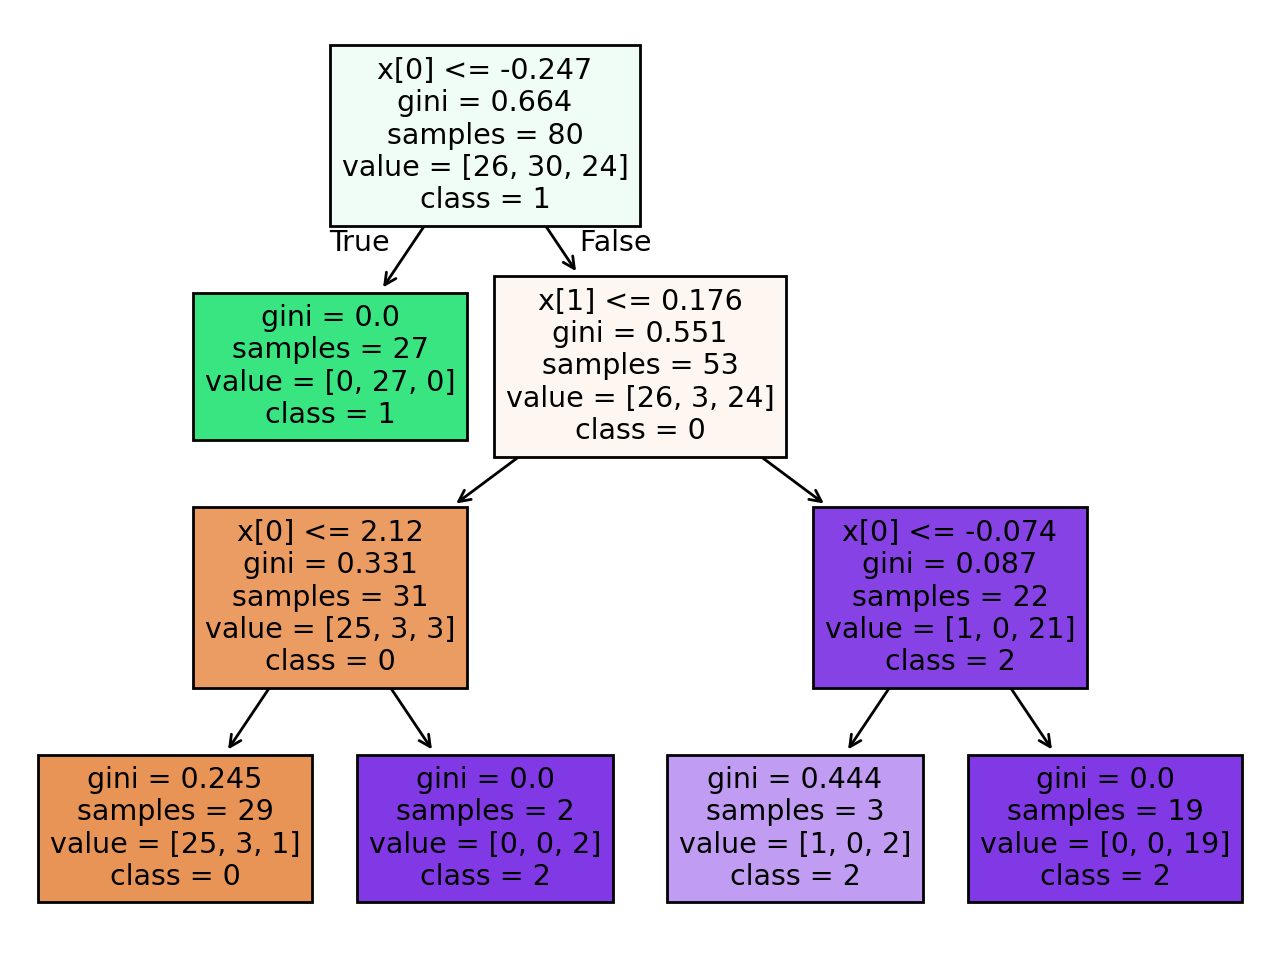

Training Accuracy: 0.9375
Test Accuracy 0.85


In [9]:
clf2 = DecisionTreeClassifier(max_depth=3, random_state = 12)   # Every time we will set random_state to 12
clf2.fit(X_train, y_train)  

# Plot the tree structure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=200)
plot_tree(clf2, feature_names=X_train.columns if hasattr(X_train, "columns") else None, 
          class_names=[str(cls) for cls in clf1.classes_],
          filled=True)
plt.show()

from sklearn.metrics import accuracy_score
print("Training Accuracy:", accuracy_score(y_train, clf2.predict(X_train)))
print("Test Accuracy",accuracy_score(y_test, clf2.predict(X_test)))

## Impurity threshold

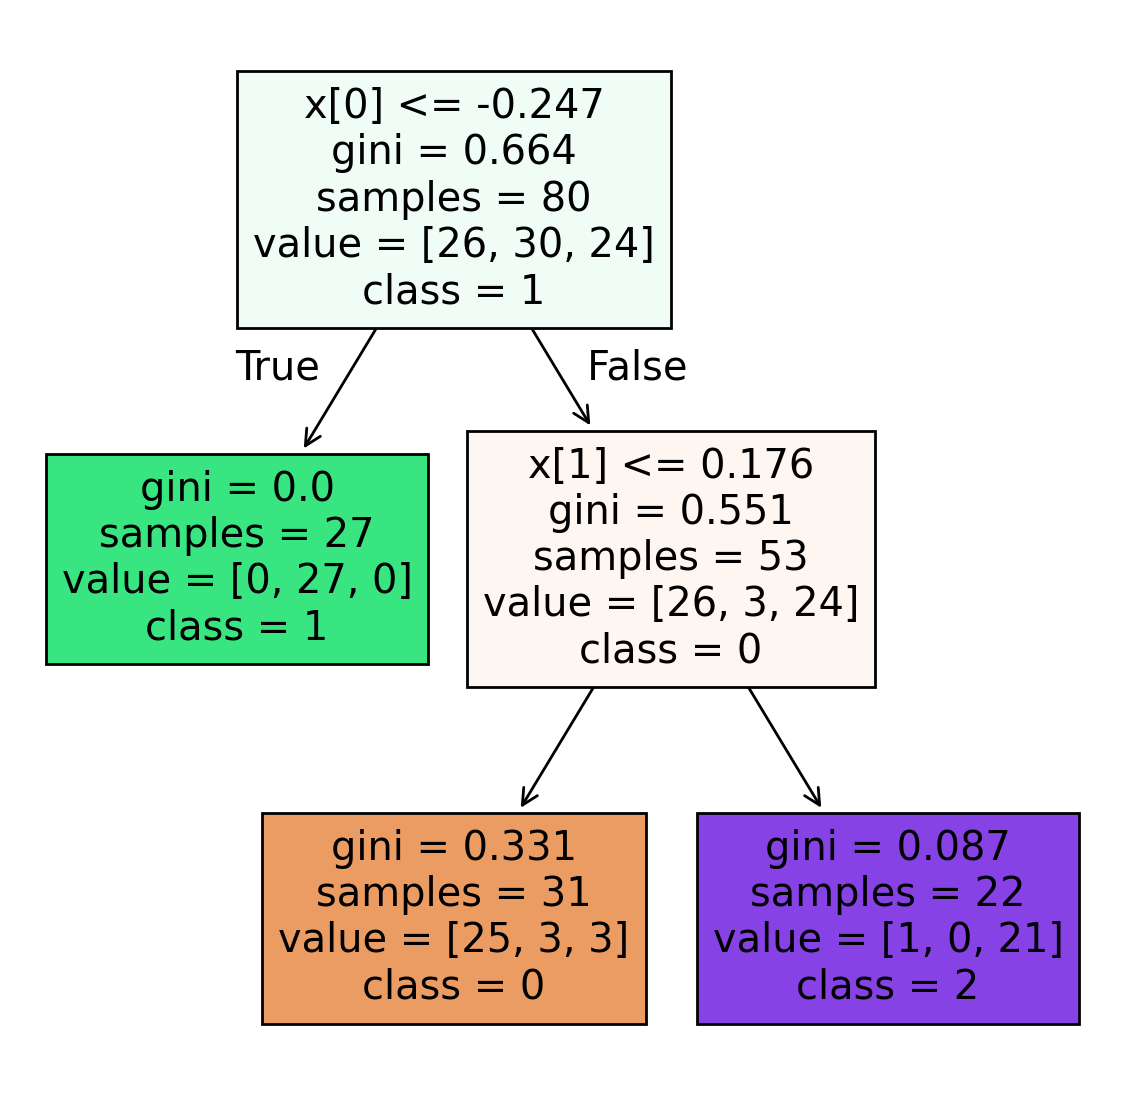

Training Accuracy: 0.9125
Test Accuracy 0.85


In [10]:
clf3 = DecisionTreeClassifier(min_impurity_decrease = 0.1, random_state = 12)
clf3.fit(X_train, y_train)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7), dpi=200)
plot_tree(clf3, feature_names=X_train.columns if hasattr(X_train, "columns") else None, 
          class_names=[str(cls) for cls in clf1.classes_],
          filled=True)
plt.show()

from sklearn.metrics import accuracy_score
print("Training Accuracy:", accuracy_score(y_train, clf3.predict(X_train)))
print("Test Accuracy",accuracy_score(y_test, clf3.predict(X_test)))

## Minimum samples in node

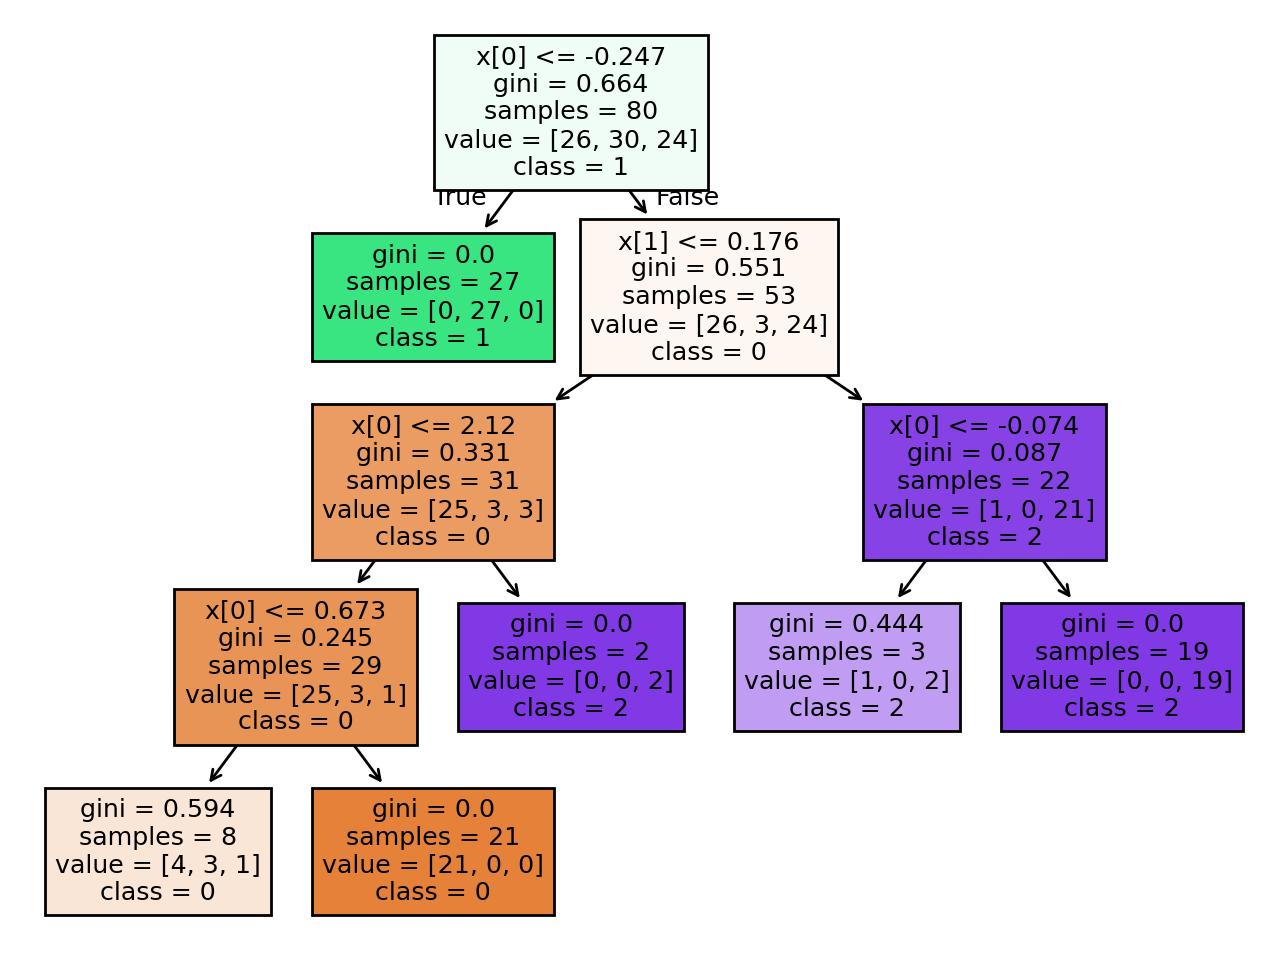

Training Accuracy: 0.9375
Test Accuracy 0.85


In [11]:
clf4 = DecisionTreeClassifier(min_samples_split=10, random_state = 12)
clf4.fit(X_train, y_train)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=200)
plot_tree(clf4, feature_names=X_train.columns if hasattr(X_train, "columns") else None, 
          class_names=[str(cls) for cls in clf1.classes_],
          filled=True)
plt.show()

from sklearn.metrics import accuracy_score
print("Training Accuracy:", accuracy_score(y_train, clf4.predict(X_train)))
print("Test Accuracy",accuracy_score(y_test, clf4.predict(X_test)))

## Cost complexity pruning for regularizatin in decision trees

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.2, random_state = 32)

#use cost_complexity_pruning_path to compute different value of alpha corresponding to different tree structure.
clf1 = DecisionTreeClassifier(random_state = 12)
path = clf1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.01166667 0.01193182 0.024375   0.0294181  0.0394327
 0.2130049  0.29865566]


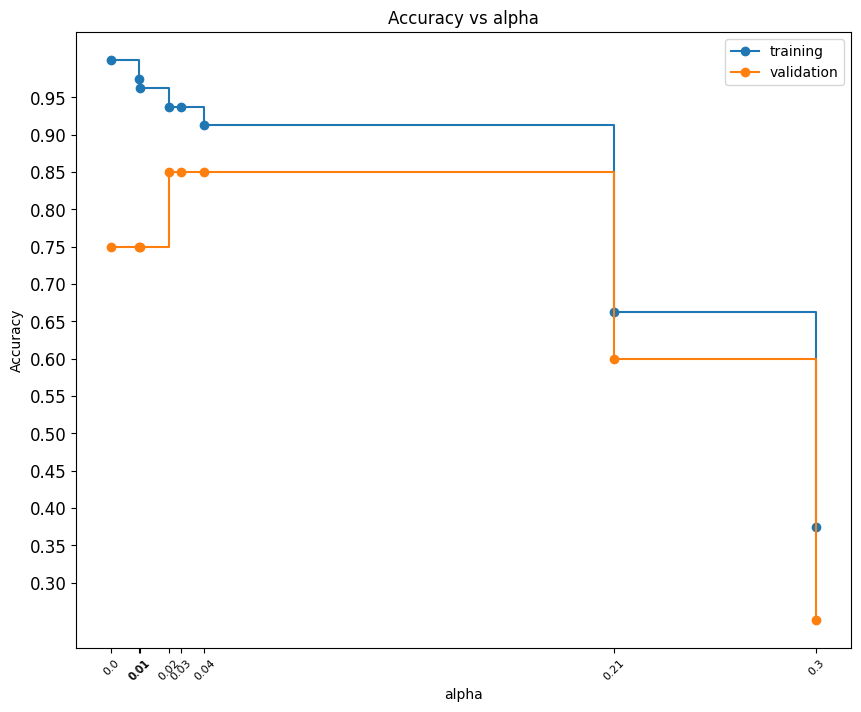

In [16]:
import numpy as np
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=12, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
  


#Calculating the scores on training and validation sets
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

# Plot of performance on different value of alpha.
plt.figure(figsize = (10,8))
plt.plot(ccp_alphas, train_scores,marker='o', label="training",
        drawstyle="steps-post")
plt.plot(ccp_alphas, valid_scores, marker='o', label="validation",
        drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs alpha")
plt.legend()
rounded_ccp = [ round(elem, 2) for elem in ccp_alphas ]
locs, labels = plt.xticks()
plt.xticks(ccp_alphas, rounded_ccp, rotation = 45, fontsize = 8)
plt.yticks(np.arange(0.3,1,0.05), fontsize = 12)
plt.show()

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.247\ngini = 0.664\nsamples = 80\nvalue = [26, 30, 24]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 0.176\ngini = 0.551\nsamples = 53\nvalue = [26, 3, 24]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.331\nsamples = 31\nvalue = [25, 3, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.087\nsamples = 22\nvalue = [1, 0, 21]')]

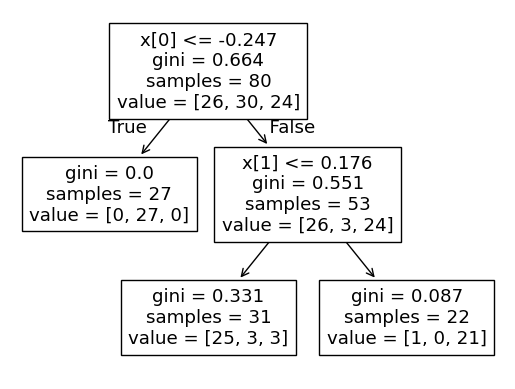

In [17]:
delta = 0.0000001 
clf2 = DecisionTreeClassifier(ccp_alpha = 0.0394327+delta, random_state = 12)
clf2.fit(X_train, y_train)
plot_tree(clf2)